# Synthseg Visualization

In [1]:
from nilearn import plotting
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# SynthSeg output run without --parc flag
img_dir = "/cnl/abcd/data/imaging/smri/interim/synthseg/test_batch/sub-NDARINVCPPYNGF9_ses-baselineYear1Arm1_noparc_segmented.nii"

# SynthSeg output run with --parc flag (see https://github.com/BBillot/SynthSeg)
parc_img_dir = "/cnl/abcd/data/imaging/smri/interim/synthseg/test_batch/sub-NDARINVCPPYNGF9_ses-baselineYear1Arm1_segmented.nii"

In [3]:
# WITHOUT CORTICAL PARCELLATION
img_nib = nib.load(img_dir)
nib_data = img_nib.get_fdata()

print(nib_data.shape)
print(np.min(nib_data))
print(np.max(nib_data))


(256, 256, 256)
0.0
60.0


In [4]:
# WITH CORTICAL PARCELLATION
parc_nib_data = nib.load(parc_img_dir).get_fdata()

print(parc_nib_data.shape)
print(np.min(parc_nib_data))
print(np.max(parc_nib_data))

(256, 256, 256)
0.0
2035.0


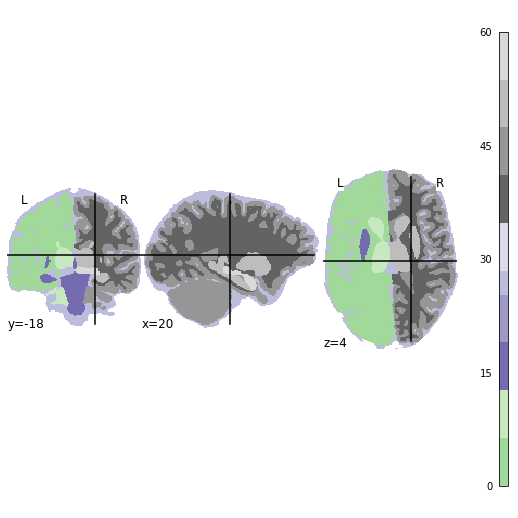

In [5]:
fig=plt.figure(figsize=(7,7))
plotting.plot_stat_map(img_dir, figure=fig, cmap='tab20c', bg_img=None)
plt.show()

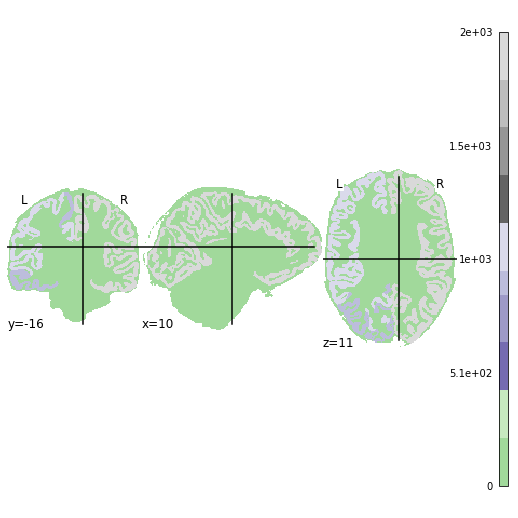

In [6]:
fig=plt.figure(figsize=(7,7))
plotting.plot_stat_map(parc_img_dir, figure=fig, cmap='tab20c', bg_img=None)
plt.show()

In [7]:
# TODO: find cortical parcellation labels
# TODO: understand what volumes.csv is
#
# potential locations: SynthSeg/data/labels_classes_priors/
# synthseg_parcellation_labels.npy
# synthseg_parcellation_names.npy

In [9]:
# Get the image
PATH_L = "/home/acamassa/ABCD/private-abcd-ml/models/SynthSeg/data/labels_classes_priors/synthseg_parcellation_labels.npy"
PATH_N = "/home/acamassa/ABCD/private-abcd-ml/models/SynthSeg/data/labels_classes_priors/synthseg_parcellation_names.npy"
label = np.load(PATH_L, mmap_mode='r')
name = np.load(PATH_N, mmap_mode='r')

# import 
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random

# create colormap
random.seed(50)
colors = [(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)) 
          for i in range(int(np.max(parc_nib_data)))]
cmap = ListedColormap(colors)

# create reference table
def colortable(colors, title, colors_sort = True, emptycols = 0):
  
    # cell dimensions
    width = 275
    height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40
  
    # Sorting colors based on hue, saturation,
    # value and name.
    if colors_sort is True:
        to_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
         
        names = [name for hsv, name in to_hsv]
         
    else:
        names = list(colors)
  
    length_of_names = len(names)
    length_cols = 4 - emptycols
    length_rows = length_of_names // length_cols + int(length_of_names % length_cols > 0)
  
    width2 = width * 4 + 2 * margin
    height2 = height * length_rows + margin + topmargin
    dpi = 72
  
    figure, axes = plt.subplots(figsize =(width2 / dpi, height2 / dpi), dpi = dpi)
    figure.subplots_adjust(margin / width2, margin / height2,
                        (width2-margin)/width2, (height2-topmargin)/height2)
     
    axes.set_xlim(0, width * 4)
    axes.set_ylim(height * (length_rows-0.5), -height / 2.)
    axes.yaxis.set_visible(False)
    axes.xaxis.set_visible(False)
    axes.set_axis_off()
    axes.set_title(title, fontsize = 24, loc ="left", pad = 10)
  
    for i, name in enumerate(names):
         
        rows = i % length_rows
        cols = i // length_rows
        y = rows * height
  
        swatch_start_x = width * cols
        swatch_end_x = width * cols + swatch_width
        text_pos_x = width * cols + swatch_width + 7
  
        axes.text(text_pos_x, y, name, fontsize = 14,
                horizontalalignment ='left',
                verticalalignment ='center')
  
        axes.hlines(y, swatch_start_x, swatch_end_x,
                  color = colors[name], linewidth = 18)
  
    return figure

# link the color with parcellation labels
info = dict(zip(list(label), list(name)))
part_dic = {}
for i in list(info.keys()):
    part_dic[info[i]] = colors[i-1]

In [10]:
# MOST RECENT IMAGE OUTPUT
img_dir = "../../../data-lite/synthseg-test-output-20230208/baseline/sub-NDARINVCPPYNGF9_ses-baselineYear1Arm1_run-01_T1w_synthseg.nii"

In [11]:
img_data = nib.load(img_dir).get_fdata()

print(img_data.shape)
print(np.min(img_data))
print(np.max(img_data))

(256, 256, 256)
0.0
2035.0


In [12]:
np.unique(img_data).astype(int)

array([   0,    2,    4,    5,    7,    8,   10,   11,   12,   13,   14,
         15,   16,   17,   18,   24,   26,   28,   41,   43,   44,   46,
         47,   49,   50,   51,   52,   53,   54,   58,   60, 1001, 1002,
       1003, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014,
       1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025,
       1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 2001,
       2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035])

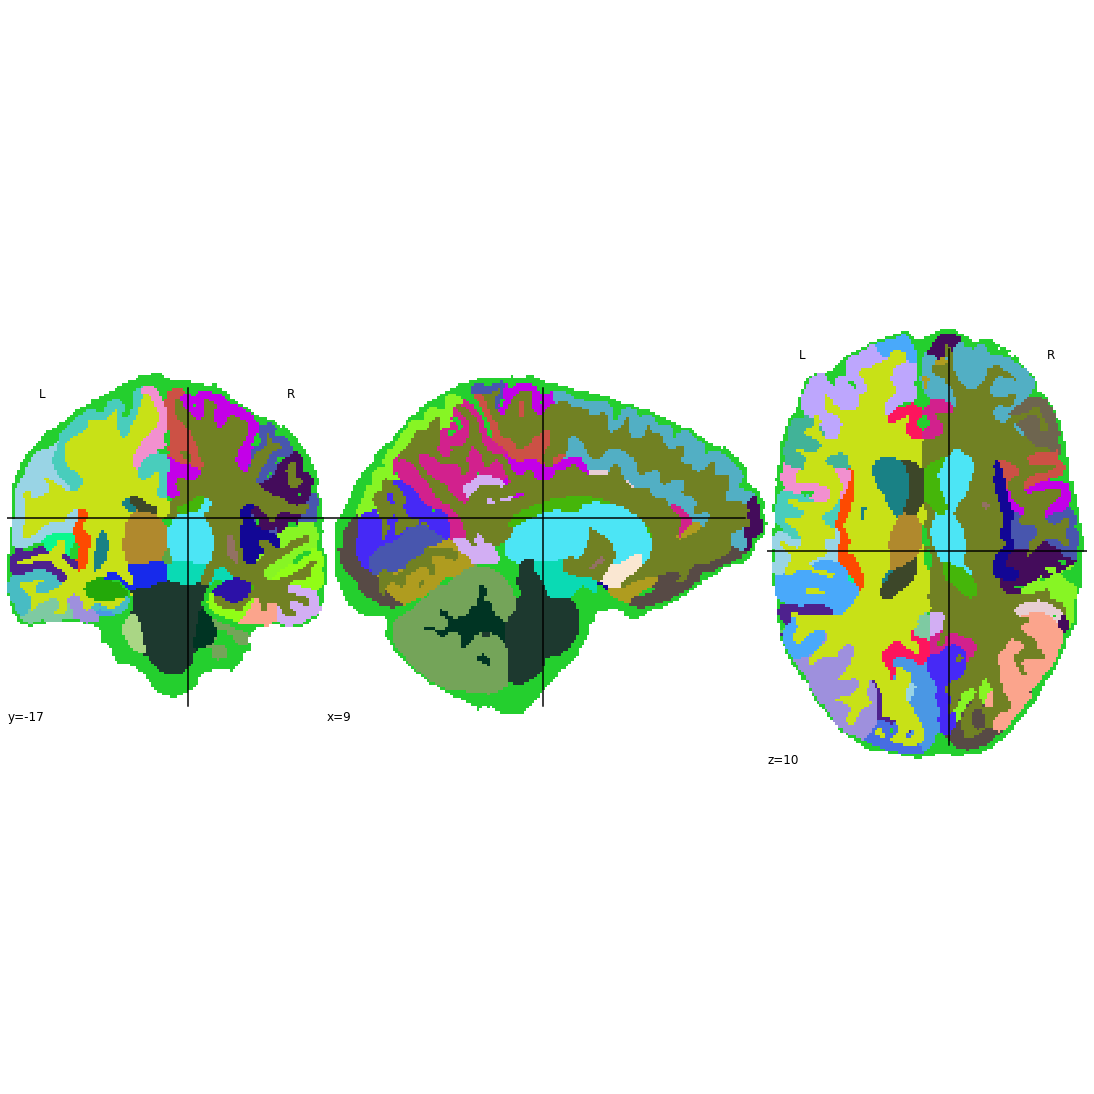

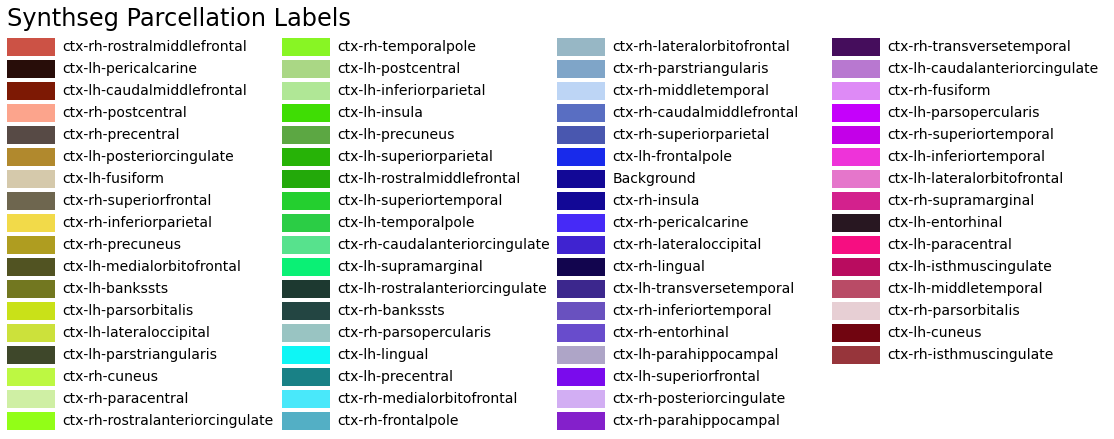

In [13]:
fig = plt.figure(figsize=(15,15))
plotting.plot_stat_map(img_dir, figure=fig, cmap=cmap, colorbar=False, bg_img=None)
plt.show()
colortable(part_dic, "Synthseg Parcellation Labels")
plt.show()